In [1]:
using Revise
using GenSlam
import Images
import FileIO: save
import PyPlot
import Random
import Gen
import GenSceneGraphs
S = GenSceneGraphs
Random.seed!(0);

┌ Info: Precompiling GenSlam [921d89da-470c-4139-990e-345fceaa5d1a]
└ @ Base loading.jl:1278


In [2]:
# create scene
num_objects = 3
gt_g, agent_view = sample_scene(num_objects)

true

In [3]:
# generate initial state
g = deepcopy(gt_g)
agent_pose = S.getAbsolutePose(g, :agent)
S.removeObject!(g, :agent)
observations = Gen.choicemap()
for (name, pose) in S.floatingPosesOf(g)
    rel_pose = pose / agent_pose
    observations[:obs => name] = rel_pose
    observations[:agent => :rot] = agent_pose.orientation
end

hypers = Hypers(
    num_objects = 3,
    scene_pose_bounds = (xmin=-1,xmax=1,ymin=-1,ymax=1,zmin=-1,zmax=1),
    obs_pos_stdev = 0.01,
    obs_rot_conc = 500.
)
trace, weight = Gen.generate(static_model, (hypers,), observations);

In [4]:
# perform inference
num_iters = 4000
for iter in 1:num_iters
    global trace
    for i in 1:hypers.num_objects
        trace = pose_kernel(trace, (:obj, i); scale=num_iters/(10*iter))
    end
    trace = pos_kernel(trace, :agent)
    @show iter, Gen.get_score(trace)
end

(iter, Gen.get_score(trace)) = (1, -20203.56876813539)
(iter, Gen.get_score(trace)) = (2, -20085.734334927347)
(iter, Gen.get_score(trace)) = (3, -17020.105267753937)
(iter, Gen.get_score(trace)) = (4, -8106.4379037404715)
(iter, Gen.get_score(trace)) = (5, -7349.229746762341)
(iter, Gen.get_score(trace)) = (6, -7148.018515520097)
(iter, Gen.get_score(trace)) = (7, -7148.018515520097)
(iter, Gen.get_score(trace)) = (8, -1891.1993114384406)
(iter, Gen.get_score(trace)) = (9, -1891.1993114384406)
(iter, Gen.get_score(trace)) = (10, -1859.4459164025598)
(iter, Gen.get_score(trace)) = (11, -1859.4459164025598)
(iter, Gen.get_score(trace)) = (12, -1859.4459164025598)
(iter, Gen.get_score(trace)) = (13, -1833.8054452701538)
(iter, Gen.get_score(trace)) = (14, -1780.9319177631282)
(iter, Gen.get_score(trace)) = (15, -1759.4088547477436)
(iter, Gen.get_score(trace)) = (16, -1759.4088547477436)
(iter, Gen.get_score(trace)) = (17, -1262.1489952504112)
(iter, Gen.get_score(trace)) = (18, -1259.07

(iter, Gen.get_score(trace)) = (147, -565.2441402657372)
(iter, Gen.get_score(trace)) = (148, -566.0271011125944)
(iter, Gen.get_score(trace)) = (149, -566.0271011125944)
(iter, Gen.get_score(trace)) = (150, -566.0271011125944)
(iter, Gen.get_score(trace)) = (151, -566.0271011125944)
(iter, Gen.get_score(trace)) = (152, -566.0271011125944)
(iter, Gen.get_score(trace)) = (153, -559.6349391450614)
(iter, Gen.get_score(trace)) = (154, -559.6349391450614)
(iter, Gen.get_score(trace)) = (155, -559.0451324441061)
(iter, Gen.get_score(trace)) = (156, -557.9361811229162)
(iter, Gen.get_score(trace)) = (157, -555.2286370648721)
(iter, Gen.get_score(trace)) = (158, -556.5794988644808)
(iter, Gen.get_score(trace)) = (159, -556.5794988644808)
(iter, Gen.get_score(trace)) = (160, -556.5794988644808)
(iter, Gen.get_score(trace)) = (161, -556.2056170818076)
(iter, Gen.get_score(trace)) = (162, -556.2056170818076)
(iter, Gen.get_score(trace)) = (163, -539.1117420198382)
(iter, Gen.get_score(trace)) = 

(iter, Gen.get_score(trace)) = (298, -385.10068440889927)
(iter, Gen.get_score(trace)) = (299, -384.52366244475456)
(iter, Gen.get_score(trace)) = (300, -382.3827346238593)
(iter, Gen.get_score(trace)) = (301, -383.6046323622046)
(iter, Gen.get_score(trace)) = (302, -381.3051690954047)
(iter, Gen.get_score(trace)) = (303, -381.3051690954047)
(iter, Gen.get_score(trace)) = (304, -380.7634042044368)
(iter, Gen.get_score(trace)) = (305, -378.60019063194625)
(iter, Gen.get_score(trace)) = (306, -378.60019063194625)
(iter, Gen.get_score(trace)) = (307, -379.2914952691982)
(iter, Gen.get_score(trace)) = (308, -379.2914952691982)
(iter, Gen.get_score(trace)) = (309, -379.2914952691982)
(iter, Gen.get_score(trace)) = (310, -378.75493215630286)
(iter, Gen.get_score(trace)) = (311, -378.75493215630286)
(iter, Gen.get_score(trace)) = (312, -379.1447455868148)
(iter, Gen.get_score(trace)) = (313, -378.9104182787353)
(iter, Gen.get_score(trace)) = (314, -378.780635395536)
(iter, Gen.get_score(trace

(iter, Gen.get_score(trace)) = (453, -239.275805578265)
(iter, Gen.get_score(trace)) = (454, -238.0655055760959)
(iter, Gen.get_score(trace)) = (455, -238.0566626745928)
(iter, Gen.get_score(trace)) = (456, -236.5415288391682)
(iter, Gen.get_score(trace)) = (457, -235.63489397969227)
(iter, Gen.get_score(trace)) = (458, -235.75139042312864)
(iter, Gen.get_score(trace)) = (459, -235.9983384883288)
(iter, Gen.get_score(trace)) = (460, -234.8363856936851)
(iter, Gen.get_score(trace)) = (461, -234.8363856936851)
(iter, Gen.get_score(trace)) = (462, -234.8363856936851)
(iter, Gen.get_score(trace)) = (463, -235.58100619928595)
(iter, Gen.get_score(trace)) = (464, -235.20998682943414)
(iter, Gen.get_score(trace)) = (465, -233.7267082371305)
(iter, Gen.get_score(trace)) = (466, -233.0053466806627)
(iter, Gen.get_score(trace)) = (467, -233.0566475239724)
(iter, Gen.get_score(trace)) = (468, -228.9398492877311)
(iter, Gen.get_score(trace)) = (469, -229.7975452818189)
(iter, Gen.get_score(trace))

(iter, Gen.get_score(trace)) = (604, -194.62938150062385)
(iter, Gen.get_score(trace)) = (605, -194.62938150062385)
(iter, Gen.get_score(trace)) = (606, -195.58912574560267)
(iter, Gen.get_score(trace)) = (607, -195.58912574560267)
(iter, Gen.get_score(trace)) = (608, -195.21767299924588)
(iter, Gen.get_score(trace)) = (609, -195.65078332819084)
(iter, Gen.get_score(trace)) = (610, -194.2668585678625)
(iter, Gen.get_score(trace)) = (611, -190.91985510975437)
(iter, Gen.get_score(trace)) = (612, -191.05237567085427)
(iter, Gen.get_score(trace)) = (613, -193.64305737432963)
(iter, Gen.get_score(trace)) = (614, -193.64305737432963)
(iter, Gen.get_score(trace)) = (615, -192.90965100547987)
(iter, Gen.get_score(trace)) = (616, -193.05048361001028)
(iter, Gen.get_score(trace)) = (617, -190.20955357281724)
(iter, Gen.get_score(trace)) = (618, -192.67913322784003)
(iter, Gen.get_score(trace)) = (619, -192.0048186846847)
(iter, Gen.get_score(trace)) = (620, -191.52790090512806)
(iter, Gen.get_s

(iter, Gen.get_score(trace)) = (759, -139.80254523928056)
(iter, Gen.get_score(trace)) = (760, -141.94012474690862)
(iter, Gen.get_score(trace)) = (761, -142.40411378998817)
(iter, Gen.get_score(trace)) = (762, -142.78007085408834)
(iter, Gen.get_score(trace)) = (763, -145.80216079715566)
(iter, Gen.get_score(trace)) = (764, -142.44666518471453)
(iter, Gen.get_score(trace)) = (765, -141.83891000579897)
(iter, Gen.get_score(trace)) = (766, -139.6588792281492)
(iter, Gen.get_score(trace)) = (767, -139.89895589583378)
(iter, Gen.get_score(trace)) = (768, -140.2644276525075)
(iter, Gen.get_score(trace)) = (769, -139.4807794042191)
(iter, Gen.get_score(trace)) = (770, -138.80794036421196)
(iter, Gen.get_score(trace)) = (771, -139.12938670554308)
(iter, Gen.get_score(trace)) = (772, -138.8091822995153)
(iter, Gen.get_score(trace)) = (773, -137.91675129317278)
(iter, Gen.get_score(trace)) = (774, -141.00947948591548)
(iter, Gen.get_score(trace)) = (775, -139.23111124412148)
(iter, Gen.get_sco

(iter, Gen.get_score(trace)) = (915, -92.44388191334949)
(iter, Gen.get_score(trace)) = (916, -91.17623212494303)
(iter, Gen.get_score(trace)) = (917, -92.03012064731595)
(iter, Gen.get_score(trace)) = (918, -90.24922186632315)
(iter, Gen.get_score(trace)) = (919, -90.26652684942407)
(iter, Gen.get_score(trace)) = (920, -91.88980229167599)
(iter, Gen.get_score(trace)) = (921, -89.67048560300677)
(iter, Gen.get_score(trace)) = (922, -88.67909970779736)
(iter, Gen.get_score(trace)) = (923, -89.99565926302083)
(iter, Gen.get_score(trace)) = (924, -89.59660624878151)
(iter, Gen.get_score(trace)) = (925, -88.41576475956076)
(iter, Gen.get_score(trace)) = (926, -87.9817172888137)
(iter, Gen.get_score(trace)) = (927, -90.26753909721835)
(iter, Gen.get_score(trace)) = (928, -89.24417527627446)
(iter, Gen.get_score(trace)) = (929, -89.18784546031586)
(iter, Gen.get_score(trace)) = (930, -89.18784546031586)
(iter, Gen.get_score(trace)) = (931, -91.43544933998271)
(iter, Gen.get_score(trace)) = (

(iter, Gen.get_score(trace)) = (1069, -59.7237593983095)
(iter, Gen.get_score(trace)) = (1070, -59.516485046874095)
(iter, Gen.get_score(trace)) = (1071, -62.048687943378006)
(iter, Gen.get_score(trace)) = (1072, -63.707533942583396)
(iter, Gen.get_score(trace)) = (1073, -63.754258379058996)
(iter, Gen.get_score(trace)) = (1074, -62.99811235514838)
(iter, Gen.get_score(trace)) = (1075, -65.887393806333)
(iter, Gen.get_score(trace)) = (1076, -62.722484051537705)
(iter, Gen.get_score(trace)) = (1077, -65.72608193230245)
(iter, Gen.get_score(trace)) = (1078, -67.05740825793562)
(iter, Gen.get_score(trace)) = (1079, -69.07594718961937)
(iter, Gen.get_score(trace)) = (1080, -66.42623451717826)
(iter, Gen.get_score(trace)) = (1081, -66.69478347797315)
(iter, Gen.get_score(trace)) = (1082, -64.74161732242911)
(iter, Gen.get_score(trace)) = (1083, -65.10917140492563)
(iter, Gen.get_score(trace)) = (1084, -63.89072663124213)
(iter, Gen.get_score(trace)) = (1085, -63.707308350324084)
(iter, Gen.

(iter, Gen.get_score(trace)) = (1223, -32.33881695506834)
(iter, Gen.get_score(trace)) = (1224, -29.001718111162575)
(iter, Gen.get_score(trace)) = (1225, -28.704986245138194)
(iter, Gen.get_score(trace)) = (1226, -29.0706230324122)
(iter, Gen.get_score(trace)) = (1227, -27.541371997184154)
(iter, Gen.get_score(trace)) = (1228, -27.529490500636015)
(iter, Gen.get_score(trace)) = (1229, -28.93668574753973)
(iter, Gen.get_score(trace)) = (1230, -27.59630356977069)
(iter, Gen.get_score(trace)) = (1231, -28.67361680839809)
(iter, Gen.get_score(trace)) = (1232, -29.870555270573412)
(iter, Gen.get_score(trace)) = (1233, -30.266306000575753)
(iter, Gen.get_score(trace)) = (1234, -28.822335683098352)
(iter, Gen.get_score(trace)) = (1235, -29.135102462100615)
(iter, Gen.get_score(trace)) = (1236, -30.486138487891374)
(iter, Gen.get_score(trace)) = (1237, -26.67078874324678)
(iter, Gen.get_score(trace)) = (1238, -27.156835007388434)
(iter, Gen.get_score(trace)) = (1239, -29.420868090439985)
(ite

(iter, Gen.get_score(trace)) = (1370, -4.1459384809835935)
(iter, Gen.get_score(trace)) = (1371, -5.354377257374079)
(iter, Gen.get_score(trace)) = (1372, -5.02570564527295)
(iter, Gen.get_score(trace)) = (1373, -3.94589911104495)
(iter, Gen.get_score(trace)) = (1374, -4.7971651709597385)
(iter, Gen.get_score(trace)) = (1375, -6.646805424833381)
(iter, Gen.get_score(trace)) = (1376, -2.202336444931756)
(iter, Gen.get_score(trace)) = (1377, -1.1860363891659205)
(iter, Gen.get_score(trace)) = (1378, -2.715502939620258)
(iter, Gen.get_score(trace)) = (1379, -2.5480254658940424)
(iter, Gen.get_score(trace)) = (1380, -3.4601832265473504)
(iter, Gen.get_score(trace)) = (1381, -4.843872910288759)
(iter, Gen.get_score(trace)) = (1382, -6.361651286299658)
(iter, Gen.get_score(trace)) = (1383, -8.803222751452239)
(iter, Gen.get_score(trace)) = (1384, -4.457227814721181)
(iter, Gen.get_score(trace)) = (1385, -3.4513964567742086)
(iter, Gen.get_score(trace)) = (1386, -0.8149934590553514)
(iter, Ge

(iter, Gen.get_score(trace)) = (1522, 11.484678220012423)
(iter, Gen.get_score(trace)) = (1523, 11.556114017324205)
(iter, Gen.get_score(trace)) = (1524, 13.364941009997903)
(iter, Gen.get_score(trace)) = (1525, 14.102671728977057)
(iter, Gen.get_score(trace)) = (1526, 12.161125628568541)
(iter, Gen.get_score(trace)) = (1527, 12.899246232557367)
(iter, Gen.get_score(trace)) = (1528, 10.176992648011481)
(iter, Gen.get_score(trace)) = (1529, 11.040350737505808)
(iter, Gen.get_score(trace)) = (1530, 11.494966366580528)
(iter, Gen.get_score(trace)) = (1531, 11.251521669686717)
(iter, Gen.get_score(trace)) = (1532, 11.88138752982277)
(iter, Gen.get_score(trace)) = (1533, 11.264641940630248)
(iter, Gen.get_score(trace)) = (1534, 10.051561565942038)
(iter, Gen.get_score(trace)) = (1535, 12.980375916108642)
(iter, Gen.get_score(trace)) = (1536, 14.069675677885357)
(iter, Gen.get_score(trace)) = (1537, 13.726427429944394)
(iter, Gen.get_score(trace)) = (1538, 11.857053929337418)
(iter, Gen.get_

(iter, Gen.get_score(trace)) = (1664, 21.757649820260568)
(iter, Gen.get_score(trace)) = (1665, 21.31736941103506)
(iter, Gen.get_score(trace)) = (1666, 19.95383308472495)
(iter, Gen.get_score(trace)) = (1667, 17.783917597137787)
(iter, Gen.get_score(trace)) = (1668, 20.14119768362925)
(iter, Gen.get_score(trace)) = (1669, 20.25644818106528)
(iter, Gen.get_score(trace)) = (1670, 19.694992083730774)
(iter, Gen.get_score(trace)) = (1671, 20.46388432902522)
(iter, Gen.get_score(trace)) = (1672, 18.13903427037981)
(iter, Gen.get_score(trace)) = (1673, 20.241109637330226)
(iter, Gen.get_score(trace)) = (1674, 18.741508626885036)
(iter, Gen.get_score(trace)) = (1675, 19.422166897749115)
(iter, Gen.get_score(trace)) = (1676, 19.314128191068505)
(iter, Gen.get_score(trace)) = (1677, 20.085662362977168)
(iter, Gen.get_score(trace)) = (1678, 18.90985369288886)
(iter, Gen.get_score(trace)) = (1679, 17.78719289172612)
(iter, Gen.get_score(trace)) = (1680, 18.82432939485156)
(iter, Gen.get_score(tr

(iter, Gen.get_score(trace)) = (1811, 21.068645958177775)
(iter, Gen.get_score(trace)) = (1812, 23.76261560803046)
(iter, Gen.get_score(trace)) = (1813, 24.467348744593437)
(iter, Gen.get_score(trace)) = (1814, 21.959884715217342)
(iter, Gen.get_score(trace)) = (1815, 19.34000453101254)
(iter, Gen.get_score(trace)) = (1816, 21.17641633989755)
(iter, Gen.get_score(trace)) = (1817, 20.735473050698047)
(iter, Gen.get_score(trace)) = (1818, 19.094100455382232)
(iter, Gen.get_score(trace)) = (1819, 18.925424171696832)
(iter, Gen.get_score(trace)) = (1820, 17.074109445888297)
(iter, Gen.get_score(trace)) = (1821, 22.82145806115041)
(iter, Gen.get_score(trace)) = (1822, 20.659520179882577)
(iter, Gen.get_score(trace)) = (1823, 17.431610830901796)
(iter, Gen.get_score(trace)) = (1824, 19.63288154804752)
(iter, Gen.get_score(trace)) = (1825, 18.45265040931106)
(iter, Gen.get_score(trace)) = (1826, 22.38754009574737)
(iter, Gen.get_score(trace)) = (1827, 20.10005992979184)
(iter, Gen.get_score(t

(iter, Gen.get_score(trace)) = (1959, 20.778679011157195)
(iter, Gen.get_score(trace)) = (1960, 19.113997273062488)
(iter, Gen.get_score(trace)) = (1961, 19.759717978439326)
(iter, Gen.get_score(trace)) = (1962, 21.461991963928725)
(iter, Gen.get_score(trace)) = (1963, 21.421785568715315)
(iter, Gen.get_score(trace)) = (1964, 19.53972217485706)
(iter, Gen.get_score(trace)) = (1965, 19.69558884174924)
(iter, Gen.get_score(trace)) = (1966, 20.484892199164562)
(iter, Gen.get_score(trace)) = (1967, 21.08095848710667)
(iter, Gen.get_score(trace)) = (1968, 21.227436659160134)
(iter, Gen.get_score(trace)) = (1969, 22.035334453957375)
(iter, Gen.get_score(trace)) = (1970, 19.459508273082996)
(iter, Gen.get_score(trace)) = (1971, 18.751727037520276)
(iter, Gen.get_score(trace)) = (1972, 18.293610957292373)
(iter, Gen.get_score(trace)) = (1973, 22.033671735821727)
(iter, Gen.get_score(trace)) = (1974, 23.1077823345329)
(iter, Gen.get_score(trace)) = (1975, 22.750002918248683)
(iter, Gen.get_scor

(iter, Gen.get_score(trace)) = (2114, 27.135356103273864)
(iter, Gen.get_score(trace)) = (2115, 27.212347379625754)
(iter, Gen.get_score(trace)) = (2116, 27.774795218139857)
(iter, Gen.get_score(trace)) = (2117, 25.663127729248217)
(iter, Gen.get_score(trace)) = (2118, 25.312655789546213)
(iter, Gen.get_score(trace)) = (2119, 25.457416167068146)
(iter, Gen.get_score(trace)) = (2120, 27.46774930629813)
(iter, Gen.get_score(trace)) = (2121, 25.37125587443385)
(iter, Gen.get_score(trace)) = (2122, 25.548271655663115)
(iter, Gen.get_score(trace)) = (2123, 27.083463447944723)
(iter, Gen.get_score(trace)) = (2124, 27.616542461861165)
(iter, Gen.get_score(trace)) = (2125, 24.416932585464565)
(iter, Gen.get_score(trace)) = (2126, 22.676634770742993)
(iter, Gen.get_score(trace)) = (2127, 24.366718348905238)
(iter, Gen.get_score(trace)) = (2128, 24.869879348064202)
(iter, Gen.get_score(trace)) = (2129, 23.76609877706622)
(iter, Gen.get_score(trace)) = (2130, 27.998607466865295)
(iter, Gen.get_sc

(iter, Gen.get_score(trace)) = (2263, 25.137461087536963)
(iter, Gen.get_score(trace)) = (2264, 25.26986455796191)
(iter, Gen.get_score(trace)) = (2265, 25.921843866161254)
(iter, Gen.get_score(trace)) = (2266, 24.472102135916167)
(iter, Gen.get_score(trace)) = (2267, 24.921427854710828)
(iter, Gen.get_score(trace)) = (2268, 25.11394453972563)
(iter, Gen.get_score(trace)) = (2269, 27.180467048114693)
(iter, Gen.get_score(trace)) = (2270, 27.244070582048266)
(iter, Gen.get_score(trace)) = (2271, 27.437349511489145)
(iter, Gen.get_score(trace)) = (2272, 30.05666938349023)
(iter, Gen.get_score(trace)) = (2273, 29.145754317582423)
(iter, Gen.get_score(trace)) = (2274, 25.93527361386986)
(iter, Gen.get_score(trace)) = (2275, 26.795422040275994)
(iter, Gen.get_score(trace)) = (2276, 26.693542224501662)
(iter, Gen.get_score(trace)) = (2277, 24.341685152758288)
(iter, Gen.get_score(trace)) = (2278, 25.581765954777012)
(iter, Gen.get_score(trace)) = (2279, 29.548434198696356)
(iter, Gen.get_sco

(iter, Gen.get_score(trace)) = (2411, 27.257160691628187)
(iter, Gen.get_score(trace)) = (2412, 26.086606712621908)
(iter, Gen.get_score(trace)) = (2413, 27.92685567070346)
(iter, Gen.get_score(trace)) = (2414, 28.29998635267352)
(iter, Gen.get_score(trace)) = (2415, 29.83792079614895)
(iter, Gen.get_score(trace)) = (2416, 27.044171969365102)
(iter, Gen.get_score(trace)) = (2417, 26.168194920302284)
(iter, Gen.get_score(trace)) = (2418, 27.149674909828946)
(iter, Gen.get_score(trace)) = (2419, 29.406653210426015)
(iter, Gen.get_score(trace)) = (2420, 29.276688789833358)
(iter, Gen.get_score(trace)) = (2421, 25.083313222201255)
(iter, Gen.get_score(trace)) = (2422, 20.73579572409762)
(iter, Gen.get_score(trace)) = (2423, 26.869384331012434)
(iter, Gen.get_score(trace)) = (2424, 25.74177592314119)
(iter, Gen.get_score(trace)) = (2425, 26.85673753469588)
(iter, Gen.get_score(trace)) = (2426, 27.32323668797475)
(iter, Gen.get_score(trace)) = (2427, 27.81121023958172)
(iter, Gen.get_score(t

(iter, Gen.get_score(trace)) = (2564, 27.013859192684833)
(iter, Gen.get_score(trace)) = (2565, 24.367350971729365)
(iter, Gen.get_score(trace)) = (2566, 28.356709635422845)
(iter, Gen.get_score(trace)) = (2567, 29.359421725229197)
(iter, Gen.get_score(trace)) = (2568, 29.08072967498974)
(iter, Gen.get_score(trace)) = (2569, 30.54775984485198)
(iter, Gen.get_score(trace)) = (2570, 30.714569712388617)
(iter, Gen.get_score(trace)) = (2571, 27.811394224785005)
(iter, Gen.get_score(trace)) = (2572, 27.243473696502107)
(iter, Gen.get_score(trace)) = (2573, 28.556886081703063)
(iter, Gen.get_score(trace)) = (2574, 27.744766012970373)
(iter, Gen.get_score(trace)) = (2575, 27.554225848860888)
(iter, Gen.get_score(trace)) = (2576, 30.58716460160683)
(iter, Gen.get_score(trace)) = (2577, 30.84528514635646)
(iter, Gen.get_score(trace)) = (2578, 27.87204142914029)
(iter, Gen.get_score(trace)) = (2579, 28.848662677130832)
(iter, Gen.get_score(trace)) = (2580, 28.035071010968807)
(iter, Gen.get_scor

(iter, Gen.get_score(trace)) = (2715, 26.759637399719786)
(iter, Gen.get_score(trace)) = (2716, 24.574409576322452)
(iter, Gen.get_score(trace)) = (2717, 26.47579831233896)
(iter, Gen.get_score(trace)) = (2718, 26.702906056771297)
(iter, Gen.get_score(trace)) = (2719, 26.437797269494723)
(iter, Gen.get_score(trace)) = (2720, 26.627814592823157)
(iter, Gen.get_score(trace)) = (2721, 27.5581167592848)
(iter, Gen.get_score(trace)) = (2722, 29.595541004100404)
(iter, Gen.get_score(trace)) = (2723, 27.303764515127156)
(iter, Gen.get_score(trace)) = (2724, 29.046004359788682)
(iter, Gen.get_score(trace)) = (2725, 25.630010291199582)
(iter, Gen.get_score(trace)) = (2726, 28.065364820742253)
(iter, Gen.get_score(trace)) = (2727, 27.115825360306125)
(iter, Gen.get_score(trace)) = (2728, 25.92175564409925)
(iter, Gen.get_score(trace)) = (2729, 28.44552812244701)
(iter, Gen.get_score(trace)) = (2730, 26.86538732568141)
(iter, Gen.get_score(trace)) = (2731, 27.264421197827055)
(iter, Gen.get_score

(iter, Gen.get_score(trace)) = (2867, 28.883949406788062)
(iter, Gen.get_score(trace)) = (2868, 28.998839538909664)
(iter, Gen.get_score(trace)) = (2869, 28.81996319197789)
(iter, Gen.get_score(trace)) = (2870, 29.16189341241258)
(iter, Gen.get_score(trace)) = (2871, 28.74338481906991)
(iter, Gen.get_score(trace)) = (2872, 27.463924878535963)
(iter, Gen.get_score(trace)) = (2873, 26.90029508653366)
(iter, Gen.get_score(trace)) = (2874, 29.543084258882175)
(iter, Gen.get_score(trace)) = (2875, 29.750363222760022)
(iter, Gen.get_score(trace)) = (2876, 26.412551262601134)
(iter, Gen.get_score(trace)) = (2877, 25.162862862667104)
(iter, Gen.get_score(trace)) = (2878, 27.785371852872032)
(iter, Gen.get_score(trace)) = (2879, 30.423067108476914)
(iter, Gen.get_score(trace)) = (2880, 27.831353849960067)
(iter, Gen.get_score(trace)) = (2881, 26.176666304906632)
(iter, Gen.get_score(trace)) = (2882, 26.518356151808504)
(iter, Gen.get_score(trace)) = (2883, 26.371990229908292)
(iter, Gen.get_sco

(iter, Gen.get_score(trace)) = (3018, 24.793868266484907)
(iter, Gen.get_score(trace)) = (3019, 22.589139425144253)
(iter, Gen.get_score(trace)) = (3020, 25.273326865315205)
(iter, Gen.get_score(trace)) = (3021, 25.540897711888448)
(iter, Gen.get_score(trace)) = (3022, 26.244789433735534)
(iter, Gen.get_score(trace)) = (3023, 26.97090232788662)
(iter, Gen.get_score(trace)) = (3024, 25.476674845430153)
(iter, Gen.get_score(trace)) = (3025, 25.123425872212792)
(iter, Gen.get_score(trace)) = (3026, 25.51357177851247)
(iter, Gen.get_score(trace)) = (3027, 26.166416970459657)
(iter, Gen.get_score(trace)) = (3028, 25.55708224002869)
(iter, Gen.get_score(trace)) = (3029, 24.65342937696611)
(iter, Gen.get_score(trace)) = (3030, 25.077888045302302)
(iter, Gen.get_score(trace)) = (3031, 24.370162156355235)
(iter, Gen.get_score(trace)) = (3032, 26.42213478157869)
(iter, Gen.get_score(trace)) = (3033, 27.27054205901161)
(iter, Gen.get_score(trace)) = (3034, 25.763400728236775)
(iter, Gen.get_score

(iter, Gen.get_score(trace)) = (3174, 23.646924534918995)
(iter, Gen.get_score(trace)) = (3175, 21.966751377124993)
(iter, Gen.get_score(trace)) = (3176, 21.741859720922463)
(iter, Gen.get_score(trace)) = (3177, 25.525054382809664)
(iter, Gen.get_score(trace)) = (3178, 23.861679882006385)
(iter, Gen.get_score(trace)) = (3179, 21.206358946914605)
(iter, Gen.get_score(trace)) = (3180, 22.79350888436752)
(iter, Gen.get_score(trace)) = (3181, 25.642103539028845)
(iter, Gen.get_score(trace)) = (3182, 26.342164209893532)
(iter, Gen.get_score(trace)) = (3183, 26.75170198590473)
(iter, Gen.get_score(trace)) = (3184, 23.935671087984844)
(iter, Gen.get_score(trace)) = (3185, 24.261649228014875)
(iter, Gen.get_score(trace)) = (3186, 22.0956480594987)
(iter, Gen.get_score(trace)) = (3187, 19.502789532216305)
(iter, Gen.get_score(trace)) = (3188, 22.181978665928895)
(iter, Gen.get_score(trace)) = (3189, 25.118884853350863)
(iter, Gen.get_score(trace)) = (3190, 25.630013999228368)
(iter, Gen.get_sco

(iter, Gen.get_score(trace)) = (3323, 17.173545668606415)
(iter, Gen.get_score(trace)) = (3324, 20.605873370804076)
(iter, Gen.get_score(trace)) = (3325, 22.11820665924772)
(iter, Gen.get_score(trace)) = (3326, 20.911715464790475)
(iter, Gen.get_score(trace)) = (3327, 21.623594235016597)
(iter, Gen.get_score(trace)) = (3328, 20.786764359636962)
(iter, Gen.get_score(trace)) = (3329, 19.532556588211527)
(iter, Gen.get_score(trace)) = (3330, 20.526013840172162)
(iter, Gen.get_score(trace)) = (3331, 21.746093313882497)
(iter, Gen.get_score(trace)) = (3332, 19.533300920882148)
(iter, Gen.get_score(trace)) = (3333, 20.384937880427373)
(iter, Gen.get_score(trace)) = (3334, 17.63715527455703)
(iter, Gen.get_score(trace)) = (3335, 19.98442692407275)
(iter, Gen.get_score(trace)) = (3336, 17.98298103965712)
(iter, Gen.get_score(trace)) = (3337, 15.934236890833574)
(iter, Gen.get_score(trace)) = (3338, 18.797979946504064)
(iter, Gen.get_score(trace)) = (3339, 18.196071388366583)
(iter, Gen.get_sco

(iter, Gen.get_score(trace)) = (3475, 22.887433003356364)
(iter, Gen.get_score(trace)) = (3476, 22.483676477795306)
(iter, Gen.get_score(trace)) = (3477, 23.574746834689144)
(iter, Gen.get_score(trace)) = (3478, 23.234784850105562)
(iter, Gen.get_score(trace)) = (3479, 22.58689838156691)
(iter, Gen.get_score(trace)) = (3480, 22.93364561363672)
(iter, Gen.get_score(trace)) = (3481, 21.757772948689542)
(iter, Gen.get_score(trace)) = (3482, 22.12999176001508)
(iter, Gen.get_score(trace)) = (3483, 23.458216490017435)
(iter, Gen.get_score(trace)) = (3484, 25.141062991974813)
(iter, Gen.get_score(trace)) = (3485, 24.454882812163014)
(iter, Gen.get_score(trace)) = (3486, 26.272261043860283)
(iter, Gen.get_score(trace)) = (3487, 26.36792132441046)
(iter, Gen.get_score(trace)) = (3488, 25.269565986609408)
(iter, Gen.get_score(trace)) = (3489, 24.10435610661913)
(iter, Gen.get_score(trace)) = (3490, 23.27894303601135)
(iter, Gen.get_score(trace)) = (3491, 23.95788779208216)
(iter, Gen.get_score(

(iter, Gen.get_score(trace)) = (3626, 26.532354982351094)
(iter, Gen.get_score(trace)) = (3627, 29.108408015523423)
(iter, Gen.get_score(trace)) = (3628, 29.828909847209502)
(iter, Gen.get_score(trace)) = (3629, 28.81794599540696)
(iter, Gen.get_score(trace)) = (3630, 27.51845362324307)
(iter, Gen.get_score(trace)) = (3631, 23.679239596281235)
(iter, Gen.get_score(trace)) = (3632, 22.09545082373276)
(iter, Gen.get_score(trace)) = (3633, 26.647955794189258)
(iter, Gen.get_score(trace)) = (3634, 21.693236596480233)
(iter, Gen.get_score(trace)) = (3635, 25.806464220002432)
(iter, Gen.get_score(trace)) = (3636, 28.074202678006287)
(iter, Gen.get_score(trace)) = (3637, 28.638233548282557)
(iter, Gen.get_score(trace)) = (3638, 26.920990136026482)
(iter, Gen.get_score(trace)) = (3639, 27.02780921680943)
(iter, Gen.get_score(trace)) = (3640, 22.361836689577686)
(iter, Gen.get_score(trace)) = (3641, 23.62735641176704)
(iter, Gen.get_score(trace)) = (3642, 24.894181314386515)
(iter, Gen.get_scor

(iter, Gen.get_score(trace)) = (3777, 24.925796435191643)
(iter, Gen.get_score(trace)) = (3778, 25.727680346802664)
(iter, Gen.get_score(trace)) = (3779, 25.34156181680099)
(iter, Gen.get_score(trace)) = (3780, 27.23407428591775)
(iter, Gen.get_score(trace)) = (3781, 28.238994381114708)
(iter, Gen.get_score(trace)) = (3782, 26.22918243047193)
(iter, Gen.get_score(trace)) = (3783, 27.116070211496613)
(iter, Gen.get_score(trace)) = (3784, 27.675419162305786)
(iter, Gen.get_score(trace)) = (3785, 27.019321876312524)
(iter, Gen.get_score(trace)) = (3786, 26.721694567972648)
(iter, Gen.get_score(trace)) = (3787, 30.239566959133207)
(iter, Gen.get_score(trace)) = (3788, 25.13900032778006)
(iter, Gen.get_score(trace)) = (3789, 31.98052690020618)
(iter, Gen.get_score(trace)) = (3790, 29.804426506146143)
(iter, Gen.get_score(trace)) = (3791, 30.29484945707693)
(iter, Gen.get_score(trace)) = (3792, 29.835903282806598)
(iter, Gen.get_score(trace)) = (3793, 30.71993378472643)
(iter, Gen.get_score(

(iter, Gen.get_score(trace)) = (3930, 22.299124864253685)
(iter, Gen.get_score(trace)) = (3931, 23.00679303394037)
(iter, Gen.get_score(trace)) = (3932, 25.52155586133614)
(iter, Gen.get_score(trace)) = (3933, 21.849386510857073)
(iter, Gen.get_score(trace)) = (3934, 24.385818622823017)
(iter, Gen.get_score(trace)) = (3935, 23.613669032729796)
(iter, Gen.get_score(trace)) = (3936, 22.34887199638851)
(iter, Gen.get_score(trace)) = (3937, 22.277573295320224)
(iter, Gen.get_score(trace)) = (3938, 21.428734594082982)
(iter, Gen.get_score(trace)) = (3939, 24.63489359392822)
(iter, Gen.get_score(trace)) = (3940, 25.253337166414873)
(iter, Gen.get_score(trace)) = (3941, 26.183465133229305)
(iter, Gen.get_score(trace)) = (3942, 27.403173911125904)
(iter, Gen.get_score(trace)) = (3943, 29.20135425939135)
(iter, Gen.get_score(trace)) = (3944, 28.994376149903516)
(iter, Gen.get_score(trace)) = (3945, 29.32322681161186)
(iter, Gen.get_score(trace)) = (3946, 27.577123203005584)
(iter, Gen.get_score

┌ Info: Creating a headless physics client to use as default
└ @ GenSceneGraphs._PyBulletUtils /julia_projects/MyProject/deps/GenSceneGraphs.jl/src/pybullet_utils.jl:113


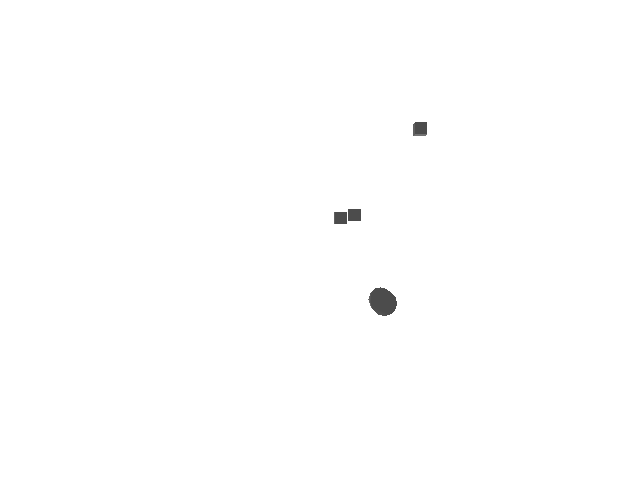

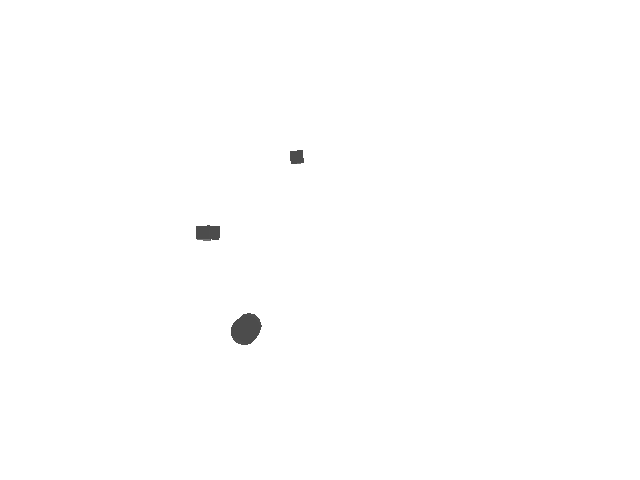

pybullet build time: Aug 11 2020 06:36:49


In [5]:
# visualize top-down
g = Gen.get_retval(trace)
rgba, = S.renderScene(gt_g; width=640, height=480, view=TOPDOWN_VIEW)
display(rgba)
rgba, = S.renderScene(g; width=640, height=480, view=TOPDOWN_VIEW)
display(rgba)

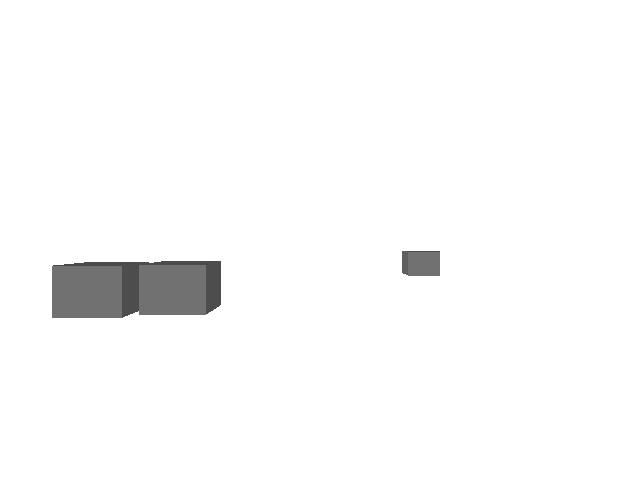

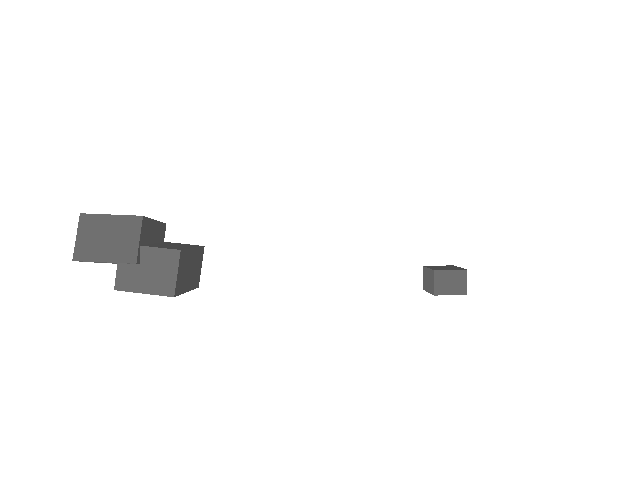

In [6]:
# visualize from agent's PoV
g = Gen.get_retval(trace)
rgba, = S.renderScene(gt_g; width=640, height=480, view=agent_view)
display(rgba)
rgba, = S.renderScene(g; width=640, height=480, view=make_agent_view(trace[:agent]))
display(rgba)